In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(908, 25)

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are many NaN values which need to be filled

In [6]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [7]:
df['latitude'].fillna(int(df['latitude'].mean()), inplace=True)
df['longitude'].fillna(int(df['longitude'].mean()), inplace=True)
df['commissioning_year'].fillna(int(df['commissioning_year'].mean()), inplace=True)
df['year_of_capacity_data'].fillna(int(df['year_of_capacity_data'].mean()), inplace=True)

### Dropping columns which do not add value to the prediction

In [8]:
df.drop(['owner'], axis = 1, inplace = True)
df.drop(['other_fuel1'], axis = 1, inplace = True)
df.drop(['other_fuel2'], axis = 1, inplace = True)
df.drop(['other_fuel3'], axis = 1, inplace = True)

In [9]:
df.drop(['geolocation_source'], axis = 1, inplace = True)
df.drop(['wepp_id'], axis = 1, inplace = True)

In [10]:
df['generation_gwh_2013'].fillna(int(df['generation_gwh_2013'].mean()), inplace=True)
df['generation_gwh_2014'].fillna(int(df['generation_gwh_2014'].mean()), inplace=True)
df['generation_gwh_2015'].fillna(int(df['generation_gwh_2015'].mean()), inplace=True)
df['generation_gwh_2016'].fillna(int(df['generation_gwh_2016'].mean()), inplace=True)
df['generation_gwh_2017'].fillna(int(df['generation_gwh_2017'].mean()), inplace=True)
df['generation_data_source'] = df['generation_data_source'].fillna('Central Electricity Authority')

In [11]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
commissioning_year            0
source                        0
url                           0
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

In [12]:
df['estimated_generation_gwh'].unique()

array([nan])

In [13]:
df.drop(['estimated_generation_gwh'], axis = 1, inplace = True)

In [14]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

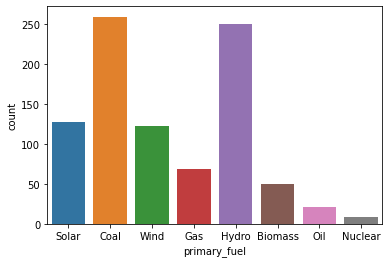

In [15]:
sns.countplot(x="primary_fuel",data=df)

In [16]:
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
source                     object
url                        object
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source     object
dtype: object

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.apply(label_encoder.fit_transform)

In [18]:
df1.dtypes

country                   int32
country_long              int32
name                      int32
gppd_idnr                 int32
capacity_mw               int64
latitude                  int64
longitude                 int64
primary_fuel              int32
commissioning_year        int64
source                    int32
url                       int32
year_of_capacity_data     int64
generation_gwh_2013       int64
generation_gwh_2014       int64
generation_gwh_2015       int64
generation_gwh_2016       int64
generation_gwh_2017       int64
generation_data_source    int32
dtype: object

In [19]:
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,0,0,0,658,9,731,143,6,65,109,128,0,252,253,267,270,272,0
1,0,0,1,520,180,594,234,1,50,174,173,0,252,253,267,270,272,0
2,0,0,2,854,122,421,8,7,50,21,205,0,252,253,267,270,272,0
3,0,0,3,0,204,547,808,2,58,22,58,0,158,157,198,199,178,0
4,0,0,4,1,345,424,704,1,69,22,58,0,228,275,351,362,341,0


In [34]:
df1['generation_data_source'].unique()

array([0])

In [35]:
df1.drop(['generation_data_source'], axis = 1, inplace = True)

In [21]:
df1.drop(['country'], axis = 1, inplace = True)

### EDA

### Plotting Distribution Plot for checking data skewness

<AxesSubplot:xlabel='country_long', ylabel='Density'>

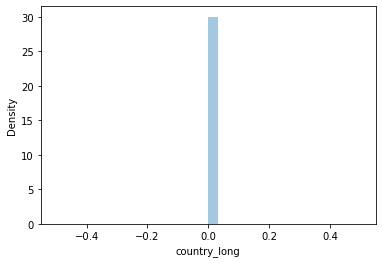

In [20]:
sns.distplot(df1['country_long'])

<AxesSubplot:xlabel='name', ylabel='Density'>

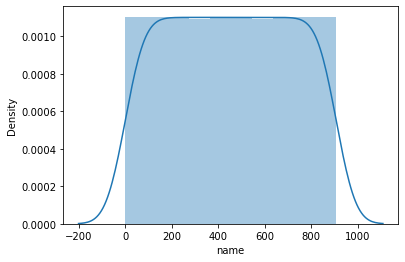

In [22]:
sns.distplot(df1['name'])

<AxesSubplot:xlabel='gppd_idnr', ylabel='Density'>

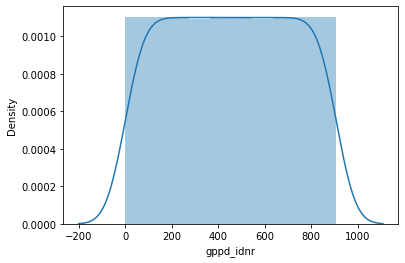

In [23]:
sns.distplot(df1['gppd_idnr'])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

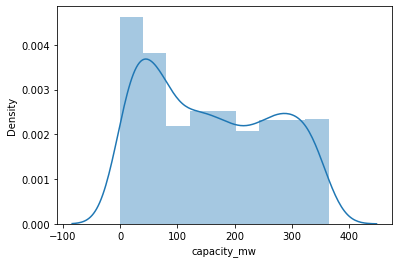

In [24]:
sns.distplot(df1['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

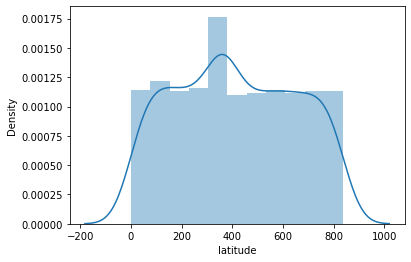

In [25]:
sns.distplot(df1['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

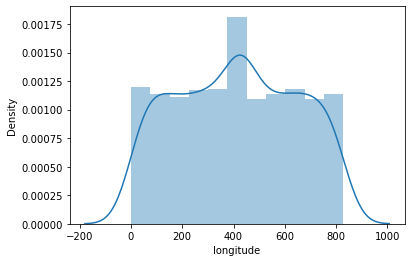

In [26]:
sns.distplot(df1['longitude'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

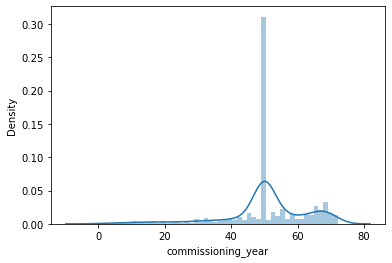

In [27]:
sns.distplot(df1['commissioning_year'])

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

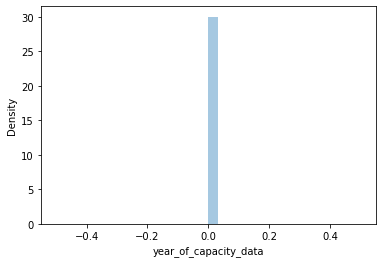

In [28]:
sns.distplot(df1['year_of_capacity_data'])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

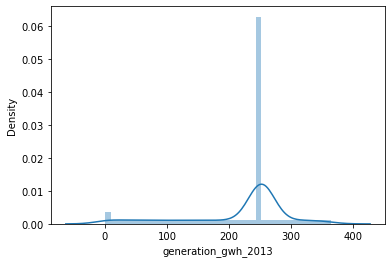

In [29]:
sns.distplot(df1['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

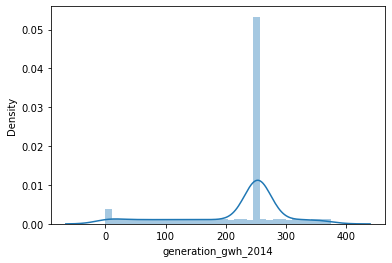

In [30]:
sns.distplot(df1['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

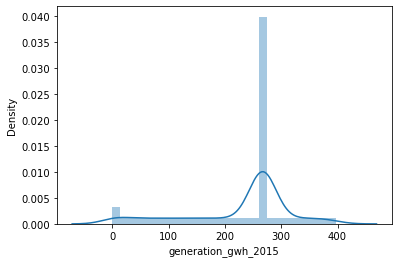

In [31]:
sns.distplot(df1['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

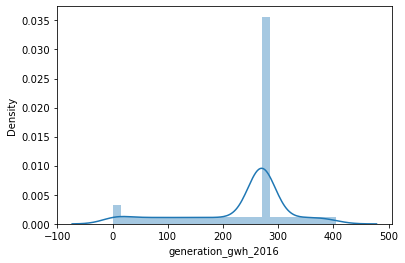

In [32]:
sns.distplot(df1['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

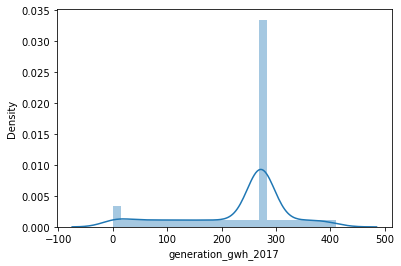

In [33]:
sns.distplot(df1['generation_gwh_2017'])

### Plotting Boxplot for checking Outliers

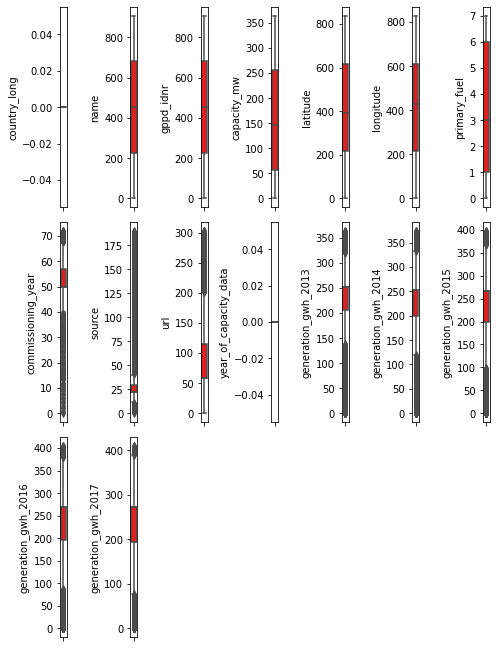

In [37]:
collist=df1.columns.values
ncol= 7
nrows= 7

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df1[collist[i]], color='red', orient='x')
    plt.tight_layout()

### Removal of Skewness

In [38]:
df1.skew()

country_long             0.000000
name                     0.000000
gppd_idnr                0.000000
capacity_mw              0.228620
latitude                 0.049777
longitude                0.001072
primary_fuel             0.471141
commissioning_year      -1.138265
source                   1.829145
url                      1.512258
year_of_capacity_data    0.000000
generation_gwh_2013     -1.302485
generation_gwh_2014     -1.198721
generation_gwh_2015     -1.100938
generation_gwh_2016     -1.050854
generation_gwh_2017     -1.018356
dtype: float64

### Removal of Outliers

In [39]:
from scipy.stats import zscore

z=np.abs(zscore(df1))

df2=df1[(z<3).all(axis=1)]

In [40]:
df2.shape

(0, 16)

In [41]:
df1.shape

(908, 16)

All the data is deleted as part of Outlier removal. so proceeding without removing outliers

In [42]:
cor=df1.corr()
cor

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,1.000000,0.336792,0.012749,-0.136241,0.033977,0.038752,-0.039119,-0.013801,0.042711,NaN,0.050131,0.048980,0.035561,0.032634,0.050657
gppd_idnr,NaN,0.336792,1.000000,-0.566669,-0.101351,-0.399362,0.607373,0.012067,0.416575,0.596994,NaN,0.354518,0.349401,0.344224,0.319660,0.311168
capacity_mw,NaN,0.012749,-0.566669,1.000000,0.080681,0.352094,-0.514198,0.280870,-0.393152,-0.349308,NaN,-0.027932,-0.013597,-0.017148,0.002238,0.004315
latitude,NaN,-0.136241,-0.101351,0.080681,1.000000,-0.046356,0.005767,0.085845,0.055135,-0.128774,NaN,0.028773,0.065312,0.060170,0.086249,0.048367
longitude,NaN,0.033977,-0.399362,0.352094,-0.046356,1.000000,-0.391422,0.104196,-0.269345,-0.315456,NaN,-0.122781,-0.132605,-0.148550,-0.096229,-0.114997
primary_fuel,NaN,0.038752,0.607373,-0.514198,0.005767,-0.391422,1.000000,-0.141909,0.053609,0.589348,NaN,0.061180,0.060238,0.055120,0.041964,0.055930
commissioning_year,NaN,-0.039119,0.012067,0.280870,0.085845,0.104196,-0.141909,1.000000,0.001737,-0.011080,NaN,0.142177,0.153406,0.142161,0.179757,0.143160
source,NaN,-0.013801,0.416575,-0.393152,0.055135,-0.269345,0.053609,0.001737,1.000000,0.160379,NaN,0.201454,0.198754,0.200132,0.200318,0.202079
url,NaN,0.042711,0.596994,-0.349308,-0.128774,-0.315456,0.589348,-0.011080,0.160379,1.000000,NaN,0.213298,0.210440,0.211898,0.212095,0.213960


<AxesSubplot:>

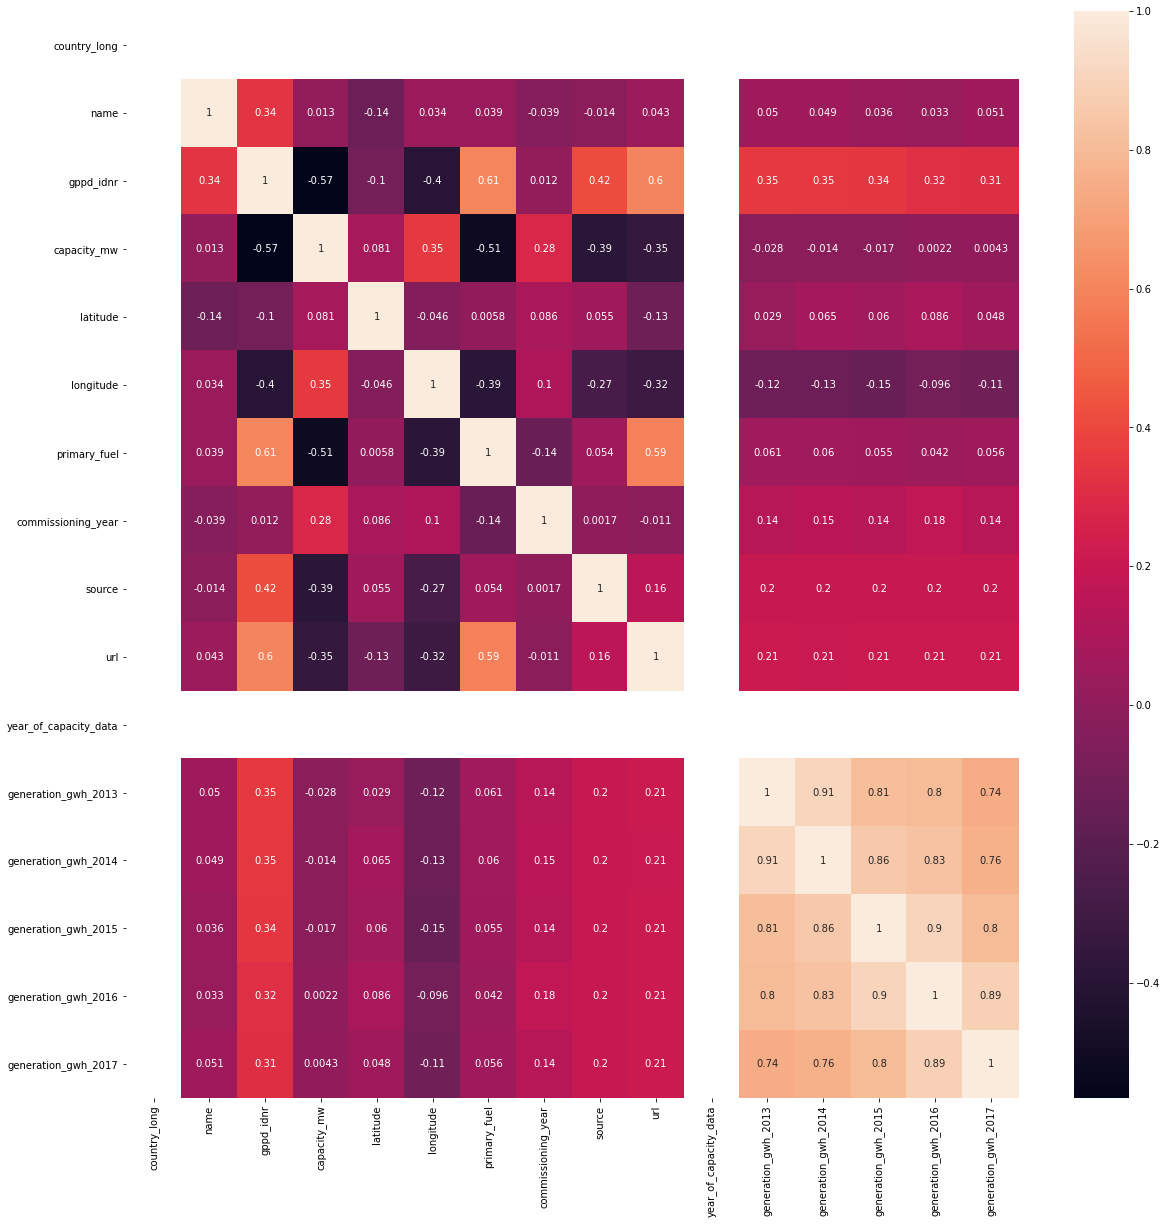

In [43]:
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

country_long and year_of_capacity_data are having all NaN values. These can be dropped

In [44]:
df1.drop(['country_long'], axis = 1, inplace = True)
df1.drop(['year_of_capacity_data'], axis = 1, inplace = True)

In [45]:
cor=df1.corr()
cor

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
name,1.000000,0.336792,0.012749,-0.136241,0.033977,0.038752,-0.039119,-0.013801,0.042711,0.050131,0.048980,0.035561,0.032634,0.050657
gppd_idnr,0.336792,1.000000,-0.566669,-0.101351,-0.399362,0.607373,0.012067,0.416575,0.596994,0.354518,0.349401,0.344224,0.319660,0.311168
capacity_mw,0.012749,-0.566669,1.000000,0.080681,0.352094,-0.514198,0.280870,-0.393152,-0.349308,-0.027932,-0.013597,-0.017148,0.002238,0.004315
latitude,-0.136241,-0.101351,0.080681,1.000000,-0.046356,0.005767,0.085845,0.055135,-0.128774,0.028773,0.065312,0.060170,0.086249,0.048367
longitude,0.033977,-0.399362,0.352094,-0.046356,1.000000,-0.391422,0.104196,-0.269345,-0.315456,-0.122781,-0.132605,-0.148550,-0.096229,-0.114997
primary_fuel,0.038752,0.607373,-0.514198,0.005767,-0.391422,1.000000,-0.141909,0.053609,0.589348,0.061180,0.060238,0.055120,0.041964,0.055930
commissioning_year,-0.039119,0.012067,0.280870,0.085845,0.104196,-0.141909,1.000000,0.001737,-0.011080,0.142177,0.153406,0.142161,0.179757,0.143160
source,-0.013801,0.416575,-0.393152,0.055135,-0.269345,0.053609,0.001737,1.000000,0.160379,0.201454,0.198754,0.200132,0.200318,0.202079
url,0.042711,0.596994,-0.349308,-0.128774,-0.315456,0.589348,-0.011080,0.160379,1.000000,0.213298,0.210440,0.211898,0.212095,0.213960
generation_gwh_2013,0.050131,0.354518,-0.027932,0.028773,-0.122781,0.061180,0.142177,0.201454,0.213298,1.000000,0.911375,0.813069,0.803750,0.744196


<AxesSubplot:>

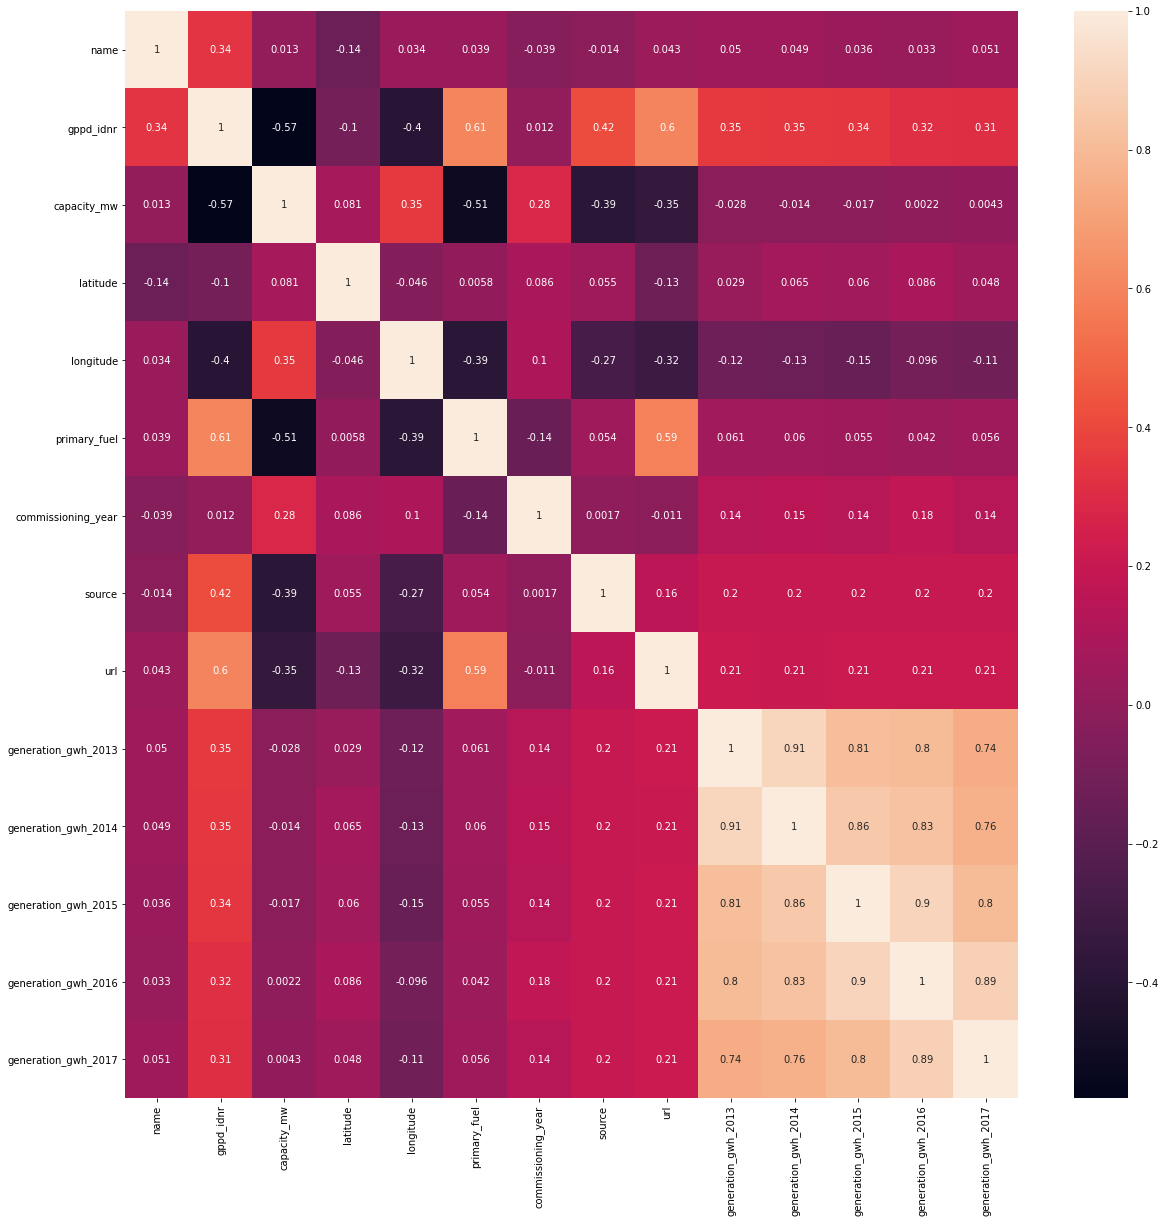

In [46]:
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

### Variance Inflation Factor

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [48]:
vif_data = pd.DataFrame()
vif_data["feature"] = df1.columns

In [49]:
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                            for i in range(len(df1.columns))]
print(vif_data)

                feature        VIF
0                  name   5.365984
1             gppd_idnr  16.581195
2           capacity_mw   6.430021
3              latitude   4.267137
4             longitude   4.630229
5          primary_fuel   6.344964
6    commissioning_year  15.533245
7                source   2.879827
8                   url   5.322372
9   generation_gwh_2013  50.038736
10  generation_gwh_2014  58.385410
11  generation_gwh_2015  48.205108
12  generation_gwh_2016  65.840838
13  generation_gwh_2017  32.683812


generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017 are having high multi collinearinty and can be dropped

In [50]:
df1.drop(['generation_gwh_2013'], axis = 1, inplace = True)
df1.drop(['generation_gwh_2014'], axis = 1, inplace = True)
df1.drop(['generation_gwh_2015'], axis = 1, inplace = True)
df1.drop(['generation_gwh_2016'], axis = 1, inplace = True)
df1.drop(['generation_gwh_2017'], axis = 1, inplace = True)

In [51]:
cor=df1.corr()
cor

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url
name,1.000000,0.336792,0.012749,-0.136241,0.033977,0.038752,-0.039119,-0.013801,0.042711
gppd_idnr,0.336792,1.000000,-0.566669,-0.101351,-0.399362,0.607373,0.012067,0.416575,0.596994
capacity_mw,0.012749,-0.566669,1.000000,0.080681,0.352094,-0.514198,0.280870,-0.393152,-0.349308
latitude,-0.136241,-0.101351,0.080681,1.000000,-0.046356,0.005767,0.085845,0.055135,-0.128774
longitude,0.033977,-0.399362,0.352094,-0.046356,1.000000,-0.391422,0.104196,-0.269345,-0.315456
primary_fuel,0.038752,0.607373,-0.514198,0.005767,-0.391422,1.000000,-0.141909,0.053609,0.589348
commissioning_year,-0.039119,0.012067,0.280870,0.085845,0.104196,-0.141909,1.000000,0.001737,-0.011080
source,-0.013801,0.416575,-0.393152,0.055135,-0.269345,0.053609,0.001737,1.000000,0.160379
url,0.042711,0.596994,-0.349308,-0.128774,-0.315456,0.589348,-0.011080,0.160379,1.000000


<AxesSubplot:>

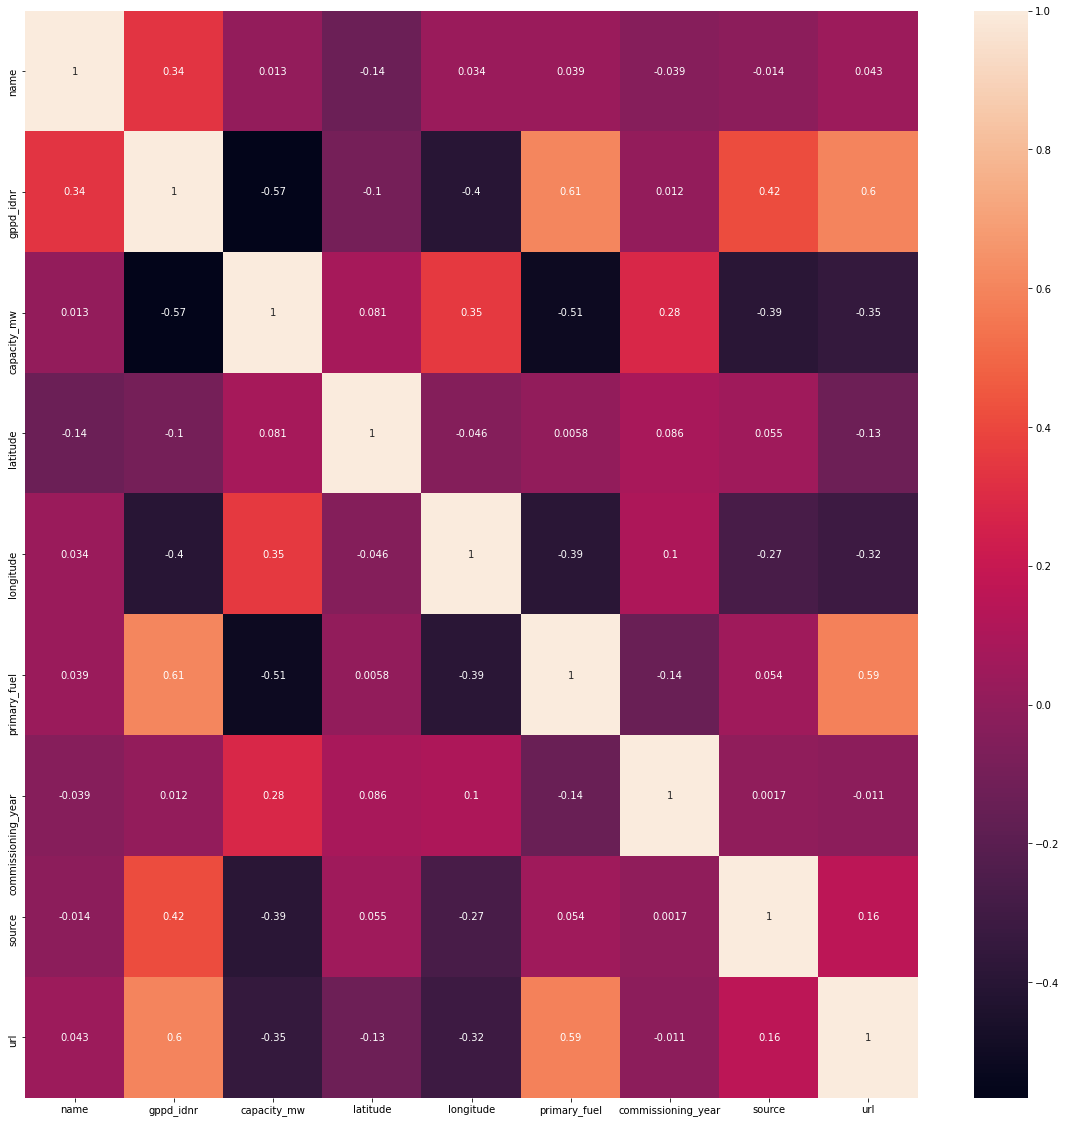

In [52]:
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

### Defining Independent and dependent variables

In [53]:
x=df1.drop('primary_fuel',axis=1)
y=df1['primary_fuel']

### Model Creation

In [54]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=10)

### Linear Regression Model

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
pred_lr=lr.predict(x_test)

In [58]:
print(r2_score(y_test,pred_lr))

0.6081363859503734


In [59]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(lr, x_train, y_train, scoring='r2', cv=5)
scores.mean()

0.5652281980017765

### Lasso Regression Model

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [61]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [62]:
ls = Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.6081309197804732

In [63]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5429423440411942

### Random Forest Regressor

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [65]:
rf= RandomForestRegressor(criterion="mse", max_features ="log2")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 92.19360163640427
Cross Val Score: 90.56139428926242


### Difference between R2 and CV score

Linear Regression: 61-57=4

Lasso Regressor: 61-54=7

Random Forest Regressor: 92-91=1

Random forest regressor has the least difference and highest accuracy. Hence using the same for final model.

In [68]:
import pickle
filename = 'global_powerplant_database.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [69]:
Final_model = pickle.load(open('global_powerplant_database.pkl', 'rb'))
result = Final_model.score(x_test, y_test)
print(result)

0.9219360163640427


In [72]:
conclusion=pd.DataFrame([Final_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Actual"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,0.68,3.07,3.0,1.0,7.0,2.85,5.73,7.0,6.97,2.68,...,6.93,1.04,1.3,6.96,1.25,6.0,6.0,2.63,7.0,5.96
Actual,0.68,3.07,3.0,1.0,7.0,2.85,5.73,7.0,6.97,2.68,...,6.93,1.04,1.3,6.96,1.25,6.0,6.0,2.63,7.0,5.96


Predicted and Actual values are same

### Prediction for Capacity_mw

In [73]:
df1.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'source', 'url'],
      dtype='object')

In [74]:
x1=df1.drop('capacity_mw',axis=1)
y1=df1['capacity_mw']

In [75]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.20, random_state=10)

In [76]:
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x1_train)
new_xtrain = norm_fit.transform(x1_train)
new_xtest = norm_fit.transform(x1_test)

In [77]:
print(new_xtrain)

[[0.4553473  0.73812155 0.06347305 ... 0.69014085 0.11111111 0.93069307]
 [0.10363837 0.06187845 0.43353293 ... 0.84507042 0.11640212 0.19141914]
 [0.2646086  0.13922652 0.61197605 ... 0.45070423 0.11640212 0.19141914]
 ...
 [0.58103638 0.30939227 0.95449102 ... 0.78873239 0.11640212 0.19141914]
 [0.13781698 0.74475138 0.18922156 ... 0.69014085 0.11111111 0.65346535]
 [0.292172   0.75248619 0.46826347 ... 0.69014085 0.11111111 0.68646865]]


In [78]:
print(new_xtest)

[[0.58324146 0.71491713 0.48023952 ... 0.69014085 0.56613757 0.22112211]
 [0.1014333  0.05966851 0.31616766 ... 0.56338028 0.11640212 0.19141914]
 [0.65380375 0.35801105 0.05508982 ... 0.15492958 0.11640212 0.19141914]
 ...
 [0.62844542 0.33480663 0.98922156 ... 0.63380282 0.11640212 0.19141914]
 [0.85446527 0.96243094 0.43113772 ... 0.69014085 0.11111111 0.84488449]
 [0.21719956 0.8121547  0.69101796 ... 0.69014085 0.20634921 0.22772277]]


### Model Generation

### Linear Regression Model

In [80]:
lr1=LinearRegression()
lr1.fit(x1_train,y1_train)

LinearRegression()

In [81]:
lr1.score(x1_train,y1_train)

0.5139008919404707

In [82]:
pred_lr1=lr1.predict(x1_test)

In [83]:
print(r2_score(y1_test,pred_lr1))

0.49388551355436994


In [87]:
from sklearn.model_selection import cross_val_score
cvscore_lr1= cross_val_score(lr1,x1_train,y1_train, scoring = 'r2', cv =2)
cv_mean=cvscore_lr1.mean()
cv_mean

0.4960720461745296

### Lasso Regression Model

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [89]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls1 = Lasso()
clf = GridSearchCV(ls1,parameters)
clf.fit(x1_train,y1_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [90]:
ls1 = Lasso(alpha=1)
ls1.fit(x1_train,y1_train)
ls1.score(x1_train,y1_train)

0.5138661246777334

In [91]:
cv_score=cross_val_score(ls1,x1,y1,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4934814695963884

In [92]:
pred_ls1=ls1.predict(x1_test)

In [93]:
print(r2_score(y1_test,pred_ls1))

0.4948107406853818


### Random Forest Regressor

In [94]:
parameters = {'criterion':['mse'],'max_features':["auto", "sqrt", "log2"]}
rf1 =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x1_train,y1_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [95]:
rf1= RandomForestRegressor(criterion="mse", max_features ="log2")
rf1.fit(x1_train, y1_train)
rf1.score(x1_train, y1_train)
pred_rf1 = rf1.predict(x1_test)

rfs = r2_score(y1_test,pred_rf1)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x1,y1,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 64.77642651988371
Cross Val Score: 63.93333708299815


### Difference Between R2 and CV score

Linear Regression = 49.38 - 49.60 = -1.22

Lasso regressor = 49.34 - 49.48 = -0.14

RandomForestRegressor = 64.77 - 63.93 = 0.84

Lasso Regressor has the least difference

In [100]:
import pickle
filename = 'global_powerplant_capacity.pkl'
pickle.dump(rf1, open(filename, 'wb'))

In [101]:
Final_model = pickle.load(open('global_powerplant_capacity.pkl', 'rb'))
result = Final_model.score(x1_test, y1_test)
print(result)

0.6477642651988371


In [103]:
conclusion=pd.DataFrame([Final_model.predict(x1_test)[:],pred_rf1[:]],index=["Predicted","Actual"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,104.41,188.93,143.56,275.64,40.32,119.51,102.29,129.72,88.96,200.19,...,126.41,287.05,156.25,94.38,143.85,21.54,46.14,187.55,16.73,31.2
Actual,104.41,188.93,143.56,275.64,40.32,119.51,102.29,129.72,88.96,200.19,...,126.41,287.05,156.25,94.38,143.85,21.54,46.14,187.55,16.73,31.2


Predicted values and Actual values are same